## Assignment 4.1 Mood Detection with OpenCV

**Name:** Eujean Marie T.Hernandez

**Section:** CPE32S8


## Importing Libraries

In [ ]:
import numpy as np
import os
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from keras.models import load_model


## Face Recognition

**Data Extraction**

In [2]:
def read_images(path, sz=None):
    c = 0
    X, y = [], []

    for dirname, dirnames, filenames in os.walk(path):
        for subdirname in dirnames:
            subject_path = os.path.join(dirname, subdirname)
            for filename in os.listdir(subject_path):
                try:
                    if filename == ".directory":
                        continue
                    filepath = os.path.join(subject_path, filename)
                    im = cv2.imread(os.path.join(subject_path, filename), cv2.IMREAD_GRAYSCALE)

                    # Check if the image is not empty or has valid dimensions
                    if im is not None and im.shape[0] > 0 and im.shape[1] > 0:
                        # Resize the images to the prescribed size
                        if sz is not None:
                            im = cv2.resize(im, sz)

                        X.append(np.asarray(im, dtype=np.uint8))
                        y.append(c)

                except IOError as e:
                    print(f"I/O Error({e.errno}): {e.strerror}")
                except cv2.error as e:
                    print(f"OpenCV Error: {e}")
                except Exception as e:
                    print("Unexpected error:", e)
                    raise
            c += 1
    return [X, y]

this read images from a specified directory structure and prepare them for training the model

In [3]:
# Path to the dataset
dataset_path = "/Users/eujean/Desktop/MoodDetection/faces"


# Read images from the dataset
[X, y] = read_images(dataset_path, (200, 200))

print("Number of images scanned:", len(X))


Number of images scanned: 296


It scanned 296 images

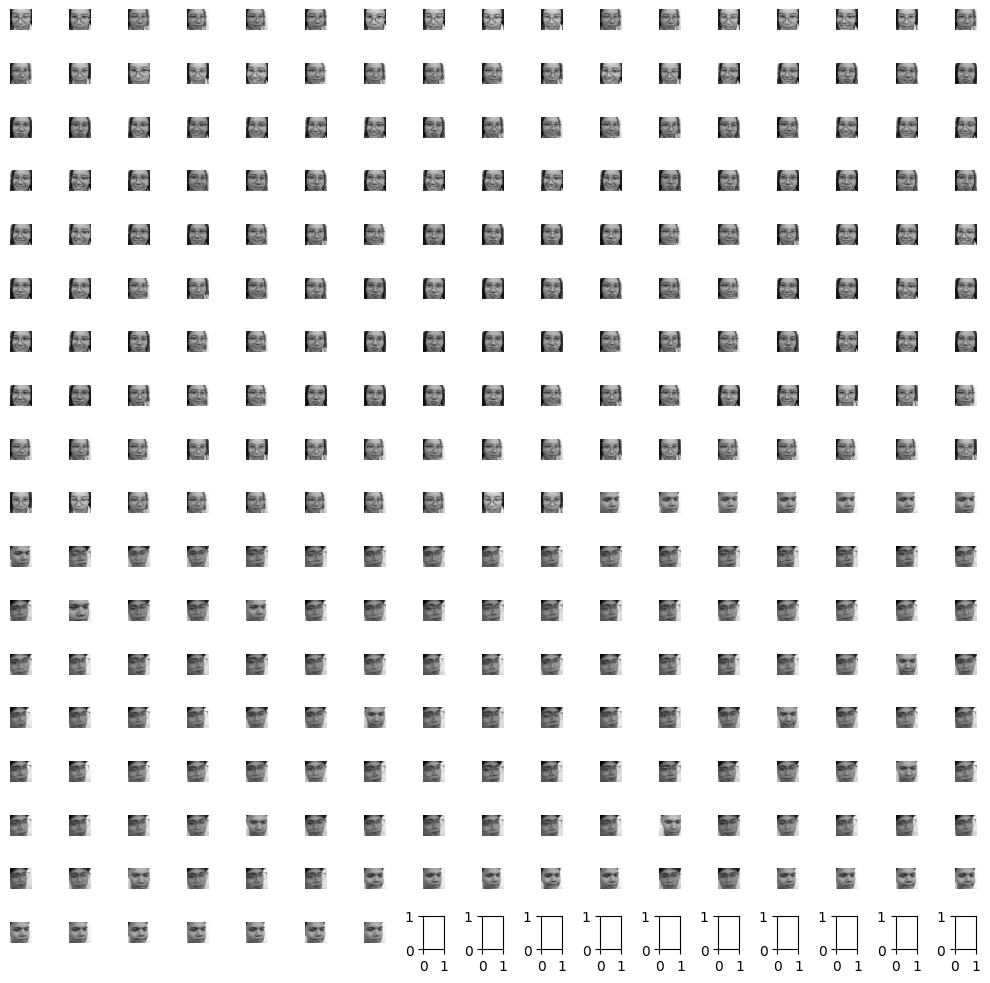

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
num_images = len(X)
row_num = int(np.ceil(np.sqrt(num_images)))
col_num = int(np.ceil(num_images / row_num))
fig, axes = plt.subplots(row_num, col_num, figsize=(10, 10))
axes = axes.flatten()
for i, img in enumerate(X):
    axes[i].imshow(img,cmap='gray')
    axes[i].axis('off')
plt.tight_layout()

I print the images stored in the X list

In [9]:
# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

I converted the lists X and y into numpy arrays. Then, splits the dataset into training and testing data sets

## CNN Model

In [23]:
# Define the model architecture

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 198, 198, 32)      320       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 99, 99, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 48, 48, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 23, 23, 128)      

In [24]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [25]:
# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=16)

Epoch 1/10
15/15 [==============================] - 8s 469ms/step - loss: 55.4775 - accuracy: 0.6186 - val_loss: 0.0128 - val_accuracy: 1.0000
Epoch 2/10
15/15 [==============================] - 7s 461ms/step - loss: 0.6299 - accuracy: 0.8983 - val_loss: 0.0161 - val_accuracy: 0.9833
Epoch 3/10
15/15 [==============================] - 7s 460ms/step - loss: 0.0080 - accuracy: 0.9958 - val_loss: 1.8440e-05 - val_accuracy: 1.0000
Epoch 4/10
15/15 [==============================] - 7s 477ms/step - loss: 3.1559e-04 - accuracy: 1.0000 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 5/10
15/15 [==============================] - 7s 479ms/step - loss: 1.8847e-04 - accuracy: 1.0000 - val_loss: 9.4364e-08 - val_accuracy: 1.0000
Epoch 6/10
15/15 [==============================] - 8s 557ms/step - loss: 9.6592e-07 - accuracy: 1.0000 - val_loss: 1.2058e-07 - val_accuracy: 1.0000
Epoch 7/10
15/15 [==============================] - 8s 529ms/step - loss: 1.4674e-07 - accuracy: 1.0000 - val_loss: 3.9088e

In [27]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=16)

Epoch 1/10
15/15 [==============================] - 9s 577ms/step - loss: 2.6982e-08 - accuracy: 1.0000 - val_loss: 4.3384e-08 - val_accuracy: 1.0000
Epoch 2/10
15/15 [==============================] - 7s 488ms/step - loss: 2.5866e-08 - accuracy: 1.0000 - val_loss: 4.5483e-08 - val_accuracy: 1.0000
Epoch 3/10
15/15 [==============================] - 8s 553ms/step - loss: 2.5732e-08 - accuracy: 1.0000 - val_loss: 4.8110e-08 - val_accuracy: 1.0000
Epoch 4/10
15/15 [==============================] - 9s 571ms/step - loss: 2.4920e-08 - accuracy: 1.0000 - val_loss: 4.8875e-08 - val_accuracy: 1.0000
Epoch 5/10
15/15 [==============================] - 9s 608ms/step - loss: 2.4668e-08 - accuracy: 1.0000 - val_loss: 4.9874e-08 - val_accuracy: 1.0000
Epoch 6/10
15/15 [==============================] - 8s 513ms/step - loss: 2.4320e-08 - accuracy: 1.0000 - val_loss: 5.0217e-08 - val_accuracy: 1.0000
Epoch 7/10
15/15 [==============================] - 8s 523ms/step - loss: 2.4043e-08 - accuracy: 1.0

In [29]:
# Save the trained model
model.save('face_recognition.h5')


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


I created a CNN model for face recognition with a convolutional layer and max pooling. After that, I trained the model using the training data and evaluated its performance. I achieve  high accuracy and low loss which indicates the model is performing well.


Real-time Face Recognition 

In [ ]:
face_model = load_model("/Users/eujean/Desktop/MoodDetection/face_recognition.h5")

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


def preprocess_image(face_img):

    resized_img = cv2.resize(face_img, (200, 200))
    resized_img = np.expand_dims(resized_img, axis=0)
    resized_img = resized_img / 255.0  
    return resized_img


def recognize_faces(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        try:
            roi = cv2.resize(gray[y:y + h, x:x + w], (200, 200), interpolation=cv2.INTER_LINEAR)
            preprocessed_roi = preprocess_image(roi)
            prediction = face_model.predict(preprocessed_roi)
            if prediction[0][0] == 0:  
                label = 'Marie'
            else:
                label = 'Unknown'
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2) 
            cv2.putText(frame, label, (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)  
        except Exception as e:
            print(f"Error: {e}")
            continue

    return frame

def face_recognition():
    cap = cv2.VideoCapture(0)  
    if not cap.isOpened():
        print("Error: Could not open webcam.")
        return
    while True:
        ret, frame = cap.read()  
        if not ret:
            print("Error: Failed to capture frame.")
            break
        frame = recognize_faces(frame)  
        cv2.imshow('Face Recognition', frame) 
        if cv2.waitKey(1) & 0xFF == ord('q'):  
            break
    cap.release()
    cv2.destroyAllWindows()


if __name__ == "__main__":
    face_recognition()


This performs real-time face recognition using the CNN model I made and the Haarcascade classifier for detecting faces.

## Testing of Face Recognition

![Image Title](/Users/eujean/Desktop/MoodDetection/Output/output18.png)


![Image Title](/Users/eujean/Desktop/MoodDetection/Output/output22.png)


![Image Title](/Users/eujean/Desktop/MoodDetection/Output/output23.png)


The model accurately differentiate if the person is me or not

## Mood Detection

In [7]:
import numpy as np
import os
import cv2
import sys 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split

def read_images(path, sz=None):
    c = 0
    X, y = [], []

    for dirname, dirnames, filenames in os.walk(path):
        for subdirname in dirnames:
            subject_path = os.path.join(dirname, subdirname)
            for filename in os.listdir(subject_path):
                try:
                    if filename == ".directory":
                        continue
                    filepath = os.path.join(subject_path, filename)
                    im = cv2.imread(os.path.join(subject_path, filename), cv2.IMREAD_GRAYSCALE)

                    # Check if the image is not empty or has valid dimensions
                    if im is not None and im.shape[0] > 0 and im.shape[1] > 0:
                        # Resize the images to the prescribed size
                        if sz is not None:
                            im = cv2.resize(im, (200, 200))

                        X.append(np.asarray(im, dtype=np.uint8))
                        y.append(c)

                except IOError as e:
                    print(f"I/O Error({e.errno}): {e.strerror}")
                except cv2.error as e:
                    print(f"OpenCV Error: {e}")
                except Exception as e:
                    print("Unexpected error:", e)
                    raise
            c += 1
    return [X, y]

# Path to the dataset
dataset_path = "images"
q
[X, y] = read_images(dataset_path, (200,200))


# Print the number of images scanned
print("Number of images scanned:", len(X))


Number of images scanned: 240


In [8]:
# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [9]:
# Model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax')) 

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 198, 198, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 99, 99, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 23, 23, 128)      

In [10]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [11]:
# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
3/3 [==============================] - 6s 2s/step - loss: 604.0240 - accuracy: 0.2188 - val_loss: 334.5684 - val_accuracy: 0.3125
Epoch 2/10
3/3 [==============================] - 5s 2s/step - loss: 206.8852 - accuracy: 0.2344 - val_loss: 21.4401 - val_accuracy: 0.2708
Epoch 3/10
3/3 [==============================] - 5s 2s/step - loss: 14.1853 - accuracy: 0.4115 - val_loss: 3.6239 - val_accuracy: 0.4167
Epoch 4/10
3/3 [==============================] - 5s 2s/step - loss: 6.0079 - accuracy: 0.3281 - val_loss: 4.9728 - val_accuracy: 0.3125
Epoch 5/10
3/3 [==============================] - 5s 2s/step - loss: 2.6641 - accuracy: 0.3906 - val_loss: 0.2896 - val_accuracy: 0.9583
Epoch 6/10
3/3 [==============================] - 5s 2s/step - loss: 0.3623 - accuracy: 0.8438 - val_loss: 0.1602 - val_accuracy: 0.9583
Epoch 7/10
3/3 [==============================] - 6s 2s/step - loss: 0.1655 - accuracy: 0.9479 - val_loss: 0.1593 - val_accuracy: 0.9375
Epoch 8/10
3/3 [=================

In [12]:
# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=16)

Epoch 1/10
12/12 [==============================] - 6s 475ms/step - loss: 0.1956 - accuracy: 0.9219 - val_loss: 0.4237 - val_accuracy: 0.9583
Epoch 2/10
12/12 [==============================] - 6s 467ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.4176 - val_accuracy: 0.9583
Epoch 3/10
12/12 [==============================] - 6s 501ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.0992 - val_accuracy: 0.9583
Epoch 4/10
12/12 [==============================] - 7s 556ms/step - loss: 0.0434 - accuracy: 0.9792 - val_loss: 0.2088 - val_accuracy: 0.9583
Epoch 5/10
12/12 [==============================] - 6s 539ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.7717 - val_accuracy: 0.9583
Epoch 6/10
12/12 [==============================] - 7s 588ms/step - loss: 1.7239 - accuracy: 0.8594 - val_loss: 0.2972 - val_accuracy: 0.9583
Epoch 7/10
12/12 [==============================] - 6s 513ms/step - loss: 0.4538 - accuracy: 0.9323 - val_loss: 1.6055 - val_accuracy: 0.9583
Epoch 

In [13]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Save the trained model
model.save('mood_detection.h5')

# Save the model in the native Keras format
#model.save('my_model.h5')


2/2 [==============================] - 0s 195ms/step - loss: 0.5076 - accuracy: 0.9583
Test Loss: 0.5075732469558716
Test Accuracy: 0.9583333134651184


In [ ]:
import cv2
import numpy as np
from keras.models import load_model
from keras.preprocessing import image

# Load pre-trained face detection model
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Load pre-trained mood detection model
model = load_model('my_model.h5')

# Define function to detect faces
def detect_faces(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    return faces

# Define function to predict mood
def predict_mood(img):

    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    resized_img = cv2.resize(gray_img, (200, 200))
   
    resized_img = np.expand_dims(resized_img, axis=0)
    resized_img = np.expand_dims(resized_img, axis=-1) 
    resized_img = resized_img / 255.0  
    
    prediction = model.predict(resized_img)
    return np.argmax(prediction)


# Capture video from webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    faces = detect_faces(frame)
    
    for (x, y, w, h) in faces:
        face_img = frame[y:y+h, x:x+w]
        mood_index = predict_mood(face_img)
        
        # Draw rectangle around the face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        
        # Display mood label
        mood_labels = ["Angry" ,"Confused" , "Happy", "Sad"]
        mood = mood_labels[mood_index]
        cv2.putText(frame, mood, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    
    cv2.imshow('Mood Detection', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


## Testing of Mood Detection

![outpu1](/Users/eujean/Desktop/MoodDetection/Output/output1.png)


![Image Title](/Users/eujean/Desktop/MoodDetection/Output/output9.png)


![Image Title](/Users/eujean/Desktop/MoodDetection/Output/output10.png)


![Image Title](/Users/eujean/Desktop/MoodDetection/Output/output11.png)


![Image Title](/Users/eujean/Desktop/MoodDetection/Output/output12.png)


![Image Title](/Users/eujean/Desktop/MoodDetection/Output/output13.png)


![Image Title](/Users/eujean/Desktop/MoodDetection/Output/output14.png)


![Image Title](/Users/eujean/Desktop/MoodDetection/Output/output15.png)


![Image Title](/Users/eujean/Desktop/MoodDetection/Output/output16.png)


## Face Recognition and Mood Detection

In [ ]:
import cv2
import numpy as np
from keras.models import load_model


mood_model = load_model('my_model.h5')
face_model = load_model('face_recognition.h5')


face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

mood_labels = {0: 'Happy', 1: 'Angry', 2: 'Sad', 3: 'Confused'}


face_threshold = 0.8  

# Function to detect faces and recognize mood
def detect_faces_and_mood(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    your_face_detected = False
    
    for (x, y, w, h) in faces:
        face_roi = gray[y:y+h, x:x+w]
        face_roi = cv2.resize(face_roi, (200, 200))
        face_roi = np.expand_dims(np.expand_dims(face_roi, -1), 0)
        
        # Predict face label probabilities
        face_prob = face_model.predict(face_roi)[0]
        if face_prob[0] >= face_threshold:  # If it is your face
            your_face_detected = True
            # Predict mood
            mood_prediction = mood_model.predict(face_roi)
            mood_index = np.argmax(mood_prediction)
            label = mood_labels[mood_index]
        else:
            label = 'Unknown'
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(frame, label, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    
    return frame, your_face_detected

def main():
    video_capture = cv2.VideoCapture(0)
    
    while True:
        ret, frame = video_capture.read()
        if ret:
            frame, your_face_detected = detect_faces_and_mood(frame)
            if your_face_detected:
                cv2.imshow('Video', frame)
            else:
                cv2.putText(frame, 'Unknown', (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
                cv2.imshow('Video', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    video_capture.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()


![Image Title](/Users/eujean/Desktop/MoodDetection/Output/output24.png)

![Image Title](/Users/eujean/Desktop/MoodDetection/Output/output25.png)

![Image Title](/Users/eujean/Desktop/MoodDetection/Output/output26.png)

![Image Title](/Users/eujean/Desktop/MoodDetection/Output/output28.png)

![Image Title](/Users/eujean/Desktop/MoodDetection/Output/output29.png)